In [68]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

>Import Dataset

In [29]:
raw_data = pd.read_csv('data/TP_1_prostate_dataset.txt', delimiter='\t')
raw_data

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [30]:
X = raw_data.iloc[:,1:-3]
y = raw_data.iloc[:,-2]

In [86]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   col      97 non-null     int64  
 1   lcavol   97 non-null     float64
 2   lweight  97 non-null     float64
 3   age      97 non-null     int64  
 4   lbph     97 non-null     float64
 5   svi      97 non-null     int64  
 6   lcp      97 non-null     float64
 7   gleason  97 non-null     int64  
 8   pgg45    97 non-null     int64  
 9   lpsa     97 non-null     float64
 10  train    97 non-null     object 
dtypes: float64(5), int64(5), object(1)
memory usage: 8.5+ KB


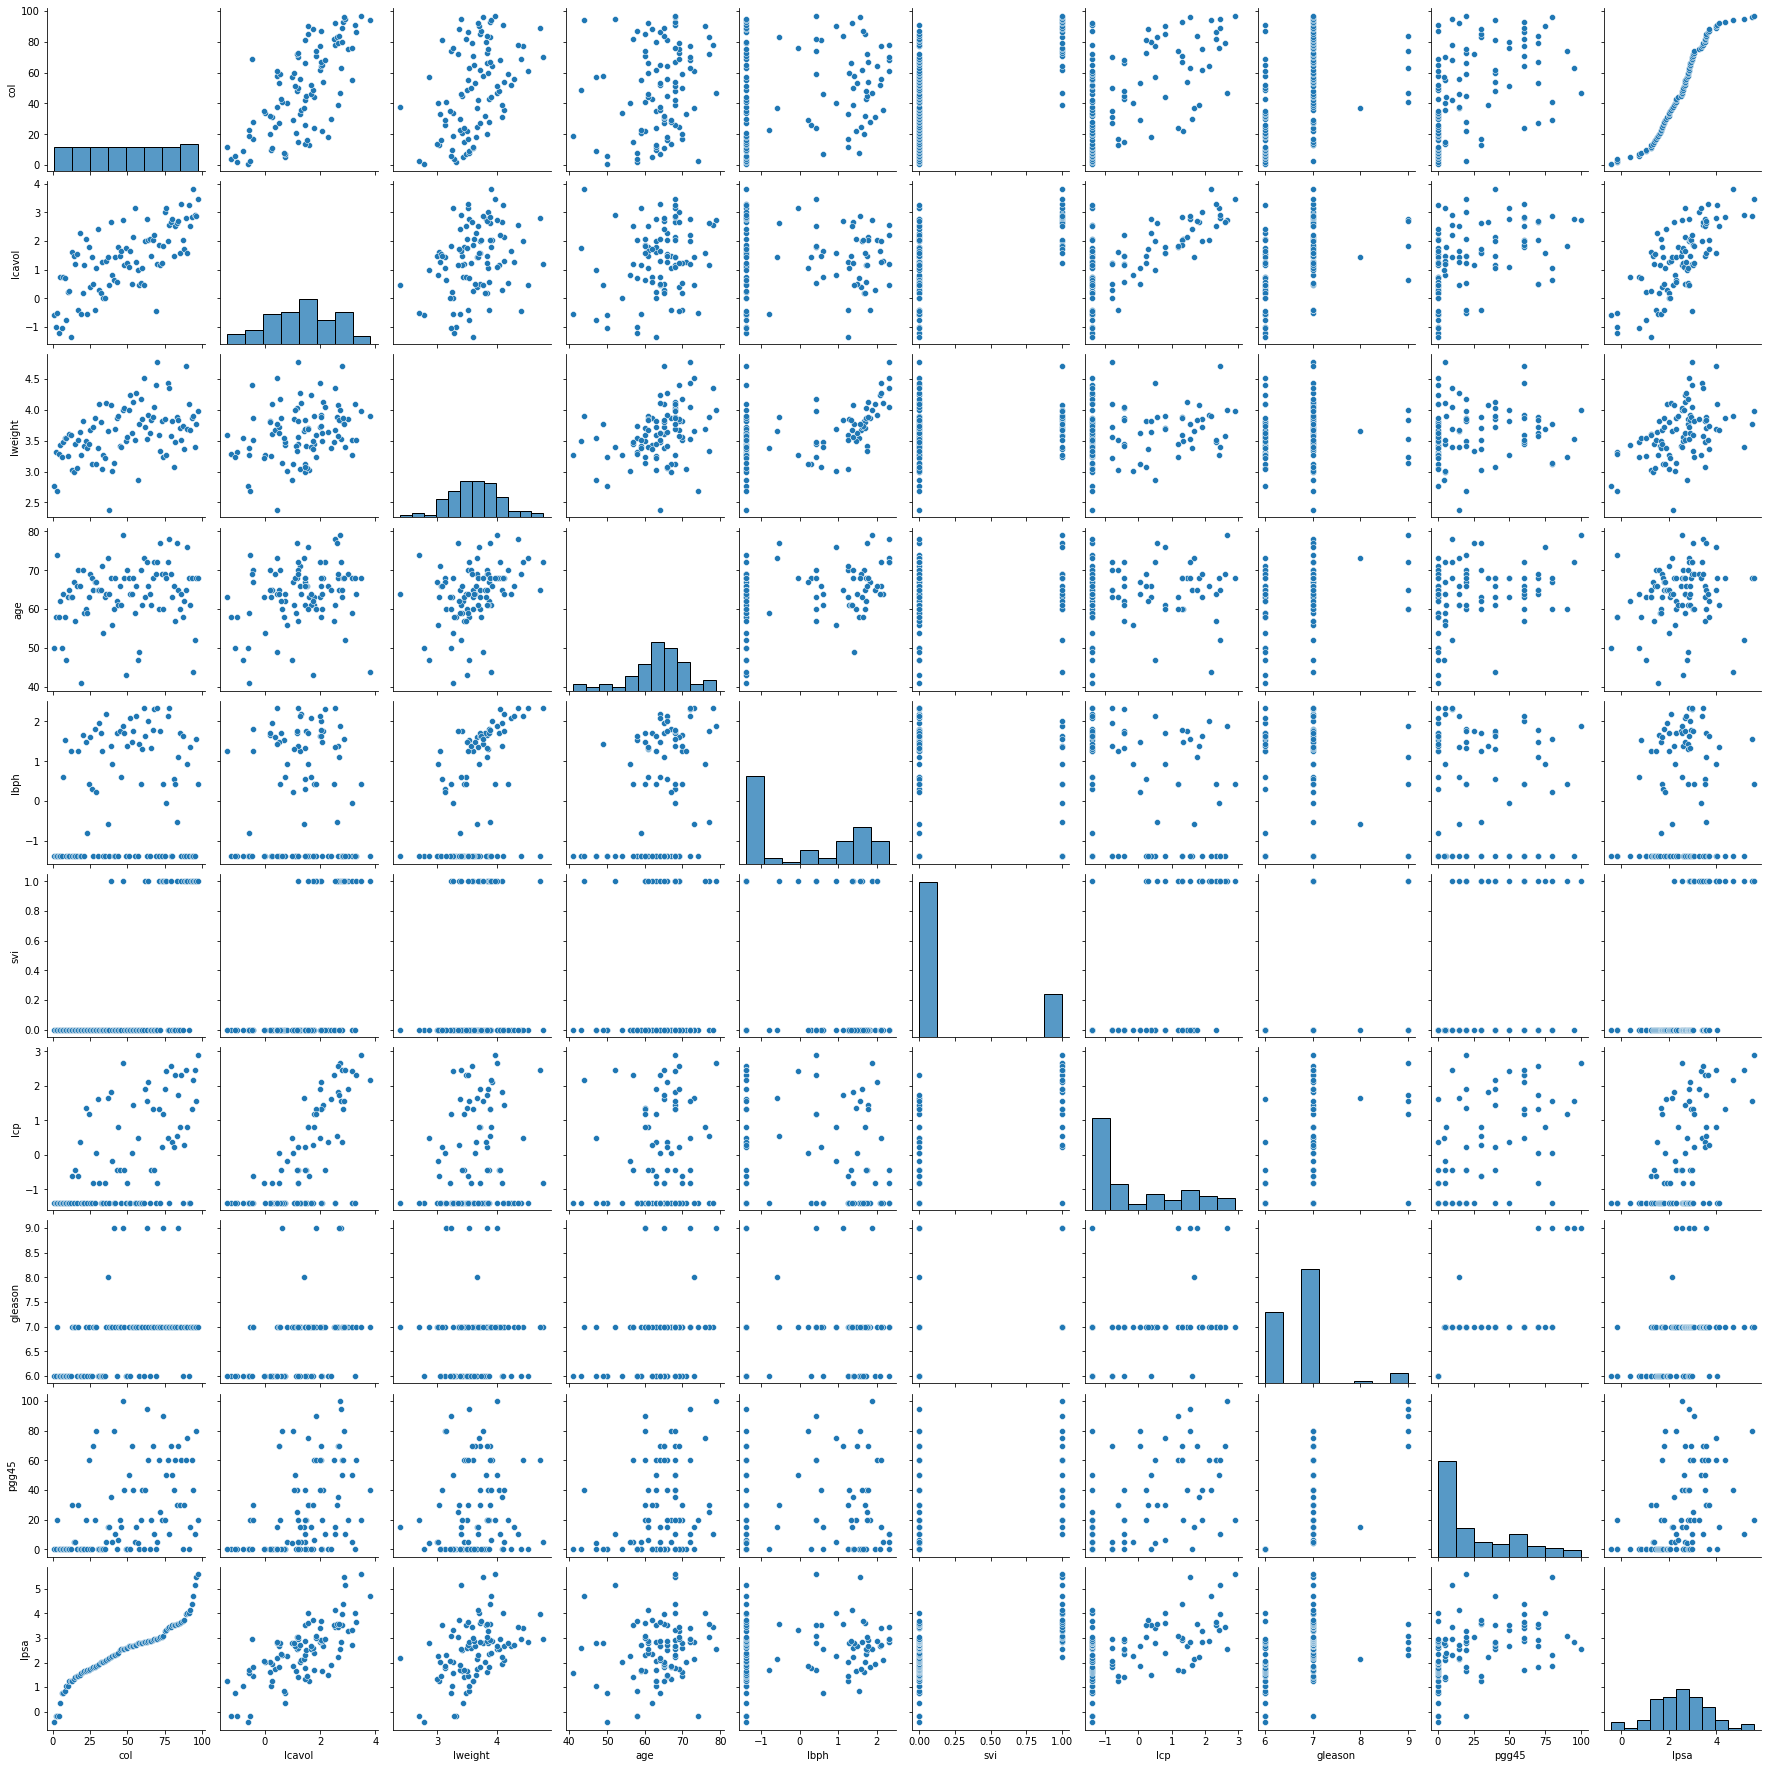

In [69]:
sns.pairplot(raw_data)

In [85]:
raw_data.describe()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


>Preprocessing

In [31]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scale = std_scale.transform(X)

>Split Train and Test 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.20)


In [33]:
print(X_train.shape)
print(X_test.shape)

(77, 7)
(20, 7)


>Baseline

In [34]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
baseline_error = np.mean((lr.predict(X_test) - y_test) **2)
print(baseline_error)

0.5475611350312386


> Test Regression Ridge

In [44]:
n_alphas = 100
alphas = np.logspace(-5, 5, 50)

ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas :
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

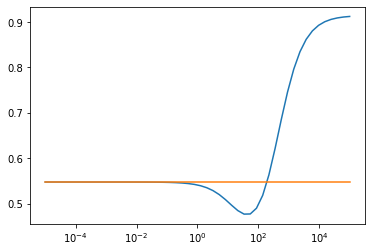

In [45]:
ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_error, baseline_error])
ax.set_xscale('log')

In [46]:
# Erreur min
np.argmin(errors)

32

In [47]:
errors[np.argmin(errors)]

0.476932827247709

In [48]:
# Paramètre de régularisation
alphas[np.argmin(errors)]

33.9322177189533

(3.162277660168379e-06,
 316227.7660168379,
 -0.26724726756075906,
 0.7473196975646323)

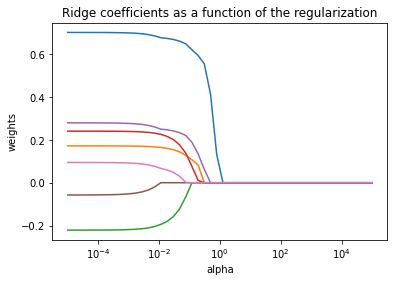

In [77]:
# Chemin de régularisation

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

> Test Lasso

In [60]:
n_alphas = 50
alphas = np.logspace(-5, 5, 50)

lasso = linear_model.Lasso()

coefs = []
errors = []
for a in alphas :
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

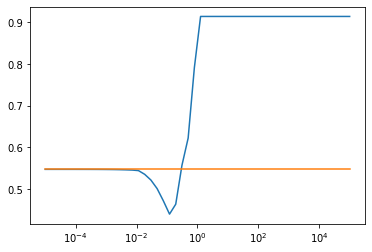

In [61]:
ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_error, baseline_error])
ax.set_xscale('log')

In [62]:
# Erreur min
np.argmin(errors)

20

In [63]:
errors[np.argmin(errors)]

0.4402160576588649

In [64]:
# Paramètre de régularisation
alphas[np.argmin(errors)]

0.1206792640639329

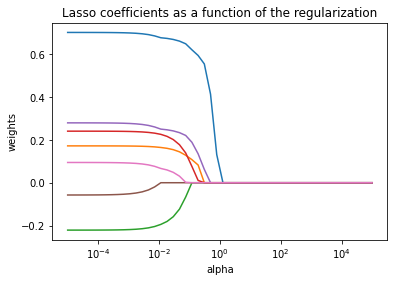

In [65]:
# Chemin de régularisation

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

> Conclusion

Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.